## Team Project 1 - EDA in Python
By Yeva Kramarova and John Little





###  I. Introduction
This data set contains the comprehensive information on collegiate sports programs across various institutions in the United States from years 2015-2019. It includes data on student enrollment, sports participation, revenue, and expenditures, categorized by gender and sport. The dataset can be used to analyze trends, financial aspects, and gender disparities in collegiate sports. The variables are as follows;

- year: Year.
- unitId: School ID.
- institution_name: School name. 
- city_txt: City name.
- state_cd: State abbreviation.
- zip_text: Zip of school.
- classification_code: Code for school clasification.
- classification_name: School classification.
- classification_other: School classification otehr.
- ef_male_count: Total male students.
- ef_female_count: Total female student.
- ef_total_count: Total students for binary male/female gender.
- sector_cd: Sector code.
- sector_name: Sector name.
- sportscode: Sport code.
- partic_men: Participation men.
- partic_women: Participation women.
- partic_coed_men: Participation for coed men.
- pactic_coed_women: Participation for coed women.
- sum_partic_men: Sum of participation for men.
- sum_partic_women: Sum of participation for women. 
- rev_men: Revenue in USD for men.
- rev_women: Revenue in USD for women.
- total_rev_menwomen: Total revenue for both.
- exp_men: Expenditures in USD for men.
- exp_women: Expenditures in USD for women. 
- total_exp_menwomen: Total expenditure for both.
- sports: Sport name. 




### II. Data Set Description
This dataset includes the total number of male and female students enrolled in each institution, providing insights into the gender distribution of the student body. Participation data is broken down by gender and sport, allowing for analysis of gender representation in different sports. Revenue and expenditures for men's and women's sports are detailed, enabling financial analysis of sports programs. Institutions are classified by type and sector, which helps in comparing different categories of schools (e.g., NCAA Division I, II, III).
The data set contains 132,327 rows and 28 columns with various data types. A complete listing is shown in Table 1.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step.1 - Sample of the dataset

In [11]:
data=pd.read_csv('/Users/EvaKramarova/Downloads/sports.csv')
data.head()

/var/folders/s2/9btr1s3d5qn_bwlr6wycq0780000gn/T/ipykernel_70703/1421407242.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('/Users/EvaKramarova/Downloads/sports.csv')


,year,unitid,institution_name,city_txt,state_cd,zip_text,classification_code,classification_name,classification_other,ef_male_count,...,partic_coed_women,sum_partic_men,sum_partic_women,rev_men,rev_women,total_rev_menwomen,exp_men,exp_women,total_exp_menwomen,sports
0,2015,100654,Alabama A & M University,Normal,AL,35762.0,2,NCAA Division I-FCS,NaN,1923,...,NaN,31,0,345592.0,NaN,345592.0,397818.0,NaN,397818.0,Baseball
1,2015,100654,Alabama A & M University,Normal,AL,35762.0,2,NCAA Division I-FCS,NaN,1923,...,NaN,19,16,1211095.0,748833.0,1959928.0,817868.0,742460.0,1560328.0,Basketball
2,2015,100654,Alabama A & M University,Normal,AL,35762.0,2,NCAA Division I-FCS,NaN,1923,...,NaN,61,46,183333.0,315574.0,498907.0,246949.0,251184.0,498133.0,All Track Combined
3,2015,100654,Alabama A & M University,Normal,AL,35762.0,2,NCAA Division I-FCS,NaN,1923,...,NaN,99,0,2808949.0,NaN,2808949.0,3059353.0,NaN,3059353.0,Football
4,2015,100654,Alabama A & M University,Normal,AL,35762.0,2,NCAA Division I-FCS,NaN,1923,...,NaN,9,0,78270.0,NaN,78270.0,83913.0,NaN,83913.0,Golf


#### Step 2 - Determining the data type

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132327 entries, 0 to 132326
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  132327 non-null  int64  
 1   unitid                132327 non-null  int64  
 2   institution_name      132327 non-null  object 
 3   city_txt              132282 non-null  object 
 4   state_cd              132282 non-null  object 
 5   zip_text              132282 non-null  float64
 6   classification_code   132327 non-null  int64  
 7   classification_name   132327 non-null  object 
 8   classification_other  1679 non-null    object 
 9   ef_male_count         132327 non-null  int64  
 10  ef_female_count       132327 non-null  int64  
 11  ef_total_count        132327 non-null  int64  
 12  sector_cd             132327 non-null  int64  
 13  sector_name           132282 non-null  object 
 14  sportscode            132327 non-null  int64  
 15  

#### Step 3 - Determining the missing values and its percentage

In [13]:
missing_data_percent=round((data.isnull().sum() / len(data))*100,2)
missing_data_percent

year                     0.00
unitid                   0.00
institution_name         0.00
city_txt                 0.03
state_cd                 0.03
zip_text                 0.03
classification_code      0.00
classification_name      0.00
classification_other    98.73
ef_male_count            0.00
ef_female_count          0.00
ef_total_count           0.00
sector_cd                0.00
sector_name              0.03
sportscode               0.00
partic_men              53.25
partic_women            47.94
partic_coed_men         99.42
partic_coed_women       99.42
sum_partic_men           0.00
sum_partic_women         0.00
rev_men                 53.25
rev_women               47.94
total_rev_menwomen      34.15
exp_men                 53.25
exp_women               47.94
total_exp_menwomen      34.15
sports                   0.00
dtype: float64

#### Step 4 - Drop 3 variables with the highest missing value percentages. 

In [20]:
new_data=data.drop(columns=['classification_other', 'partic_coed_men', 'partic_coed_women'])
new_data

,year,unitid,institution_name,city_txt,state_cd,zip_text,classification_code,classification_name,ef_male_count,ef_female_count,...,partic_women,sum_partic_men,sum_partic_women,rev_men,rev_women,total_rev_menwomen,exp_men,exp_women,total_exp_menwomen,sports
0,2015,100654,Alabama A & M University,Normal,AL,35762.0,2,NCAA Division I-FCS,1923,2300,...,NaN,31,0,345592.0,NaN,345592.0,397818.0,NaN,397818.0,Baseball
1,2015,100654,Alabama A & M University,Normal,AL,35762.0,2,NCAA Division I-FCS,1923,2300,...,16.0,19,16,1211095.0,748833.0,1959928.0,817868.0,742460.0,1560328.0,Basketball
2,2015,100654,Alabama A & M University,Normal,AL,35762.0,2,NCAA Division I-FCS,1923,2300,...,46.0,61,46,183333.0,315574.0,498907.0,246949.0,251184.0,498133.0,All Track Combined
3,2015,100654,Alabama A & M University,Normal,AL,35762.0,2,NCAA Division I-FCS,1923,2300,...,NaN,99,0,2808949.0,NaN,2808949.0,3059353.0,NaN,3059353.0,Football
4,2015,100654,Alabama A & M University,Normal,AL,35762.0,2,NCAA Division I-FCS,1923,2300,...,NaN,9,0,78270.0,NaN,78270.0,83913.0,NaN,83913.0,Golf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132322,2019,800001,Simon Fraser University,NaN,NaN,NaN,4,NCAA Division II with football,5681,6640,...,21.0,30,21,652950.0,357251.0,1010201.0,652950.0,357251.0,1010201.0,Soccer
132323,2019,800001,Simon Fraser University,NaN,NaN,NaN,4,NCAA Division II with football,5681,6640,...,19.0,0,19,NaN,381402.0,381402.0,NaN,381402.0,381402.0,Softball
132324,2019,800001,Simon Fraser University,NaN,NaN,NaN,4,NCAA Division II with football,5681,6640,...,17.0,17,17,281726.0,237917.0,519643.0,281726.0,237917.0,519643.0,Swimming
132325,2019,800001,Simon Fraser University,NaN,NaN,NaN,4,NCAA Division II with football,5681,6640,...,19.0,0,19,NaN,402135.0,402135.0,NaN,402135.0,402135.0,Volleyball


#### Step 5 - Observe the updated dataset.

In [15]:
missing_data_percent_2=round((new_data.isnull().sum() / len(data))*100,2)
missing_data_percent_2

year                    0.00
unitid                  0.00
institution_name        0.00
city_txt                0.03
state_cd                0.03
zip_text                0.03
classification_code     0.00
classification_name     0.00
ef_male_count           0.00
ef_female_count         0.00
ef_total_count          0.00
sector_cd               0.00
sector_name             0.03
sportscode              0.00
partic_men             53.25
partic_women           47.94
sum_partic_men          0.00
sum_partic_women        0.00
rev_men                53.25
rev_women              47.94
total_rev_menwomen     34.15
exp_men                53.25
exp_women              47.94
total_exp_menwomen     34.15
sports                  0.00
dtype: float64

#### Step 6 - Since there a still few variables with high missing value percentage, replace the NaN values with 0.

In [26]:
# Replace all NaN values with 0
new_data.fillna(0, inplace=True)

# Check the DataFrame to confirm NaNs are replaced
new_data.head()


,year,unitid,institution_name,city_txt,state_cd,zip_text,classification_code,classification_name,ef_male_count,ef_female_count,...,partic_women,sum_partic_men,sum_partic_women,rev_men,rev_women,total_rev_menwomen,exp_men,exp_women,total_exp_menwomen,sports
0,2015,100654,Alabama A & M University,Normal,AL,35762.0,2,NCAA Division I-FCS,1923,2300,...,0.0,31,0,345592.0,0.0,345592.0,397818.0,0.0,397818.0,Baseball
1,2015,100654,Alabama A & M University,Normal,AL,35762.0,2,NCAA Division I-FCS,1923,2300,...,16.0,19,16,1211095.0,748833.0,1959928.0,817868.0,742460.0,1560328.0,Basketball
2,2015,100654,Alabama A & M University,Normal,AL,35762.0,2,NCAA Division I-FCS,1923,2300,...,46.0,61,46,183333.0,315574.0,498907.0,246949.0,251184.0,498133.0,All Track Combined
3,2015,100654,Alabama A & M University,Normal,AL,35762.0,2,NCAA Division I-FCS,1923,2300,...,0.0,99,0,2808949.0,0.0,2808949.0,3059353.0,0.0,3059353.0,Football
4,2015,100654,Alabama A & M University,Normal,AL,35762.0,2,NCAA Division I-FCS,1923,2300,...,0.0,9,0,78270.0,0.0,78270.0,83913.0,0.0,83913.0,Golf


In [28]:
#Check the updated dataset for the missed values.
missing_data_percent_2=round((new_data.isnull().sum() / len(data))*100,2)
missing_data_percent_2

year                   0.0
unitid                 0.0
institution_name       0.0
city_txt               0.0
state_cd               0.0
zip_text               0.0
classification_code    0.0
classification_name    0.0
ef_male_count          0.0
ef_female_count        0.0
ef_total_count         0.0
sector_cd              0.0
sector_name            0.0
sportscode             0.0
partic_men             0.0
partic_women           0.0
sum_partic_men         0.0
sum_partic_women       0.0
rev_men                0.0
rev_women              0.0
total_rev_menwomen     0.0
exp_men                0.0
exp_women              0.0
total_exp_menwomen     0.0
sports                 0.0
dtype: float64

In [29]:
new_data.head()

,year,unitid,institution_name,city_txt,state_cd,zip_text,classification_code,classification_name,ef_male_count,ef_female_count,...,partic_women,sum_partic_men,sum_partic_women,rev_men,rev_women,total_rev_menwomen,exp_men,exp_women,total_exp_menwomen,sports
0,2015,100654,Alabama A & M University,Normal,AL,35762.0,2,NCAA Division I-FCS,1923,2300,...,0.0,31,0,345592.0,0.0,345592.0,397818.0,0.0,397818.0,Baseball
1,2015,100654,Alabama A & M University,Normal,AL,35762.0,2,NCAA Division I-FCS,1923,2300,...,16.0,19,16,1211095.0,748833.0,1959928.0,817868.0,742460.0,1560328.0,Basketball
2,2015,100654,Alabama A & M University,Normal,AL,35762.0,2,NCAA Division I-FCS,1923,2300,...,46.0,61,46,183333.0,315574.0,498907.0,246949.0,251184.0,498133.0,All Track Combined
3,2015,100654,Alabama A & M University,Normal,AL,35762.0,2,NCAA Division I-FCS,1923,2300,...,0.0,99,0,2808949.0,0.0,2808949.0,3059353.0,0.0,3059353.0,Football
4,2015,100654,Alabama A & M University,Normal,AL,35762.0,2,NCAA Division I-FCS,1923,2300,...,0.0,9,0,78270.0,0.0,78270.0,83913.0,0.0,83913.0,Golf


In [30]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132327 entries, 0 to 132326
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 132327 non-null  int64  
 1   unitid               132327 non-null  int64  
 2   institution_name     132327 non-null  object 
 3   city_txt             132327 non-null  object 
 4   state_cd             132327 non-null  object 
 5   zip_text             132327 non-null  float64
 6   classification_code  132327 non-null  int64  
 7   classification_name  132327 non-null  object 
 8   ef_male_count        132327 non-null  int64  
 9   ef_female_count      132327 non-null  int64  
 10  ef_total_count       132327 non-null  int64  
 11  sector_cd            132327 non-null  int64  
 12  sector_name          132327 non-null  object 
 13  sportscode           132327 non-null  int64  
 14  partic_men           132327 non-null  float64
 15  partic_women     

### III. Data Set Summary Statistics
This section will dive deeper into the statistical measurements of the dataset such as count, mean, standard deviation, min, 25th, 50th, 75th, max. Also, the section will show the proportions for each categorical variable, as well as the correlation table and matrix to show the correlation between the continuous variables.

#### Step 1 - Using .describe() to show the important statistical measurements of the datast variables and .transpose() to locate the measurements as columns. 

In [31]:
new_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,132327.0,2.017680e+03,1.485539e+00,2015.0,2016.0,2018.0,2019.0,2019.0
unitid,132327.0,1.843604e+05,5.606463e+04,100654.0,149781.0,181738.0,214069.0,800001.0
zip_text,132327.0,4.199063e+07,1.585804e+08,0.0,23220.0,49104.0,79549.0,997757500.0
classification_code,132327.0,7.779335e+00,4.889662e+00,1.0,4.0,6.0,12.0,20.0
ef_male_count,132327.0,2.126252e+03,3.014380e+03,0.0,513.0,986.0,2385.0,35954.0
ef_female_count,132327.0,2.496211e+03,3.276053e+03,0.0,652.0,1248.0,2860.0,30325.0
ef_total_count,132327.0,4.622463e+03,6.228144e+03,0.0,1194.0,2259.0,5237.0,66279.0
sector_cd,132327.0,2.210297e+00,2.103132e+00,1.0,1.0,2.0,2.0,99.0
sportscode,132327.0,1.634267e+01,1.056750e+01,1.0,7.0,16.0,25.0,38.0
partic_men,132327.0,1.442836e+01,2.530096e+01,0.0,0.0,0.0,20.0,331.0




#### Step 2 - Getting the frequency of each category and calculating proportion for each category. 

In [33]:
new_data.columns

Index(['year', 'unitid', 'institution_name', 'city_txt', 'state_cd',
       'zip_text', 'classification_code', 'classification_name',
       'ef_male_count', 'ef_female_count', 'ef_total_count', 'sector_cd',
       'sector_name', 'sportscode', 'partic_men', 'partic_women',
       'sum_partic_men', 'sum_partic_women', 'rev_men', 'rev_women',
       'total_rev_menwomen', 'exp_men', 'exp_women', 'total_exp_menwomen',
       'sports'],
      dtype='object')

In [39]:
new_data['institution_name'].value_counts()

institution_name
Westminster College                 238
Union College                       233
Columbia College                    187
Bethel University                   181
Marian University                   166
                                   ... 
CUNY LaGuardia Community College      1
Chattahoochee Technical College       1
Bryant & Stratton College-Solon       1
Wytheville Community College          1
American National University          1
Name: count, Length: 2212, dtype: int64

In [36]:
new_data['institution_name'].value_counts(normalize=True) * 100

institution_name
Westminster College                 0.179857
Union College                       0.176079
Columbia College                    0.141317
Bethel University                   0.136782
Marian University                   0.125447
                                      ...   
CUNY LaGuardia Community College    0.000756
Chattahoochee Technical College     0.000756
Bryant & Stratton College-Solon     0.000756
Wytheville Community College        0.000756
American National University        0.000756
Name: proportion, Length: 2212, dtype: float64

In [40]:
new_data['city_txt'].value_counts()

city_txt
Chicago             992
New York            824
Springfield         785
Philadelphia        777
Washington          674
                   ... 
Crow Agency           2
West Frankfort        2
Solon                 1
Wytheville            1
Long Island City      1
Name: count, Length: 1377, dtype: int64

In [37]:
new_data['city_txt'].value_counts(normalize=True) * 100

city_txt
Chicago             0.749658
New York            0.622700
Springfield         0.593227
Philadelphia        0.587182
Washington          0.509344
                      ...   
Crow Agency         0.001511
West Frankfort      0.001511
Solon               0.000756
Wytheville          0.000756
Long Island City    0.000756
Name: proportion, Length: 1377, dtype: float64

In [41]:
new_data['state_cd'].value_counts()

state_cd
CA    12054
NY    10192
PA     9161
TX     6480
IL     5844
OH     4632
MA     4418
NC     4242
FL     4005
MI     3739
MO     3236
GA     3114
VA     3090
MN     3037
IN     2936
IA     2917
NJ     2850
TN     2841
KS     2787
AL     2636
WI     2466
WA     2397
SC     2390
MD     2264
OK     2049
OR     1890
KY     1852
MS     1731
AR     1578
LA     1536
CO     1488
CT     1456
NE     1406
AZ     1403
WV     1374
ME     1255
PR     1127
NH      910
ND      876
RI      759
SD      744
NM      668
UT      656
MT      636
VT      611
DC      603
ID      469
WY      400
DE      359
HI      278
NV      254
AK      136
VI       50
0        45
Name: count, dtype: int64

In [42]:
new_data['state_cd'].value_counts(normalize=True) * 100

state_cd
CA    9.109252
NY    7.702132
PA    6.923001
TX    4.896960
IL    4.416332
OH    3.500419
MA    3.338699
NC    3.205695
FL    3.026593
MI    2.825576
MO    2.445457
GA    2.353261
VA    2.335124
MN    2.295072
IN    2.218746
IA    2.204388
NJ    2.153755
TN    2.146954
KS    2.106146
AL    1.992035
WI    1.863565
WA    1.811422
SC    1.806132
MD    1.710913
OK    1.548437
OR    1.428280
KY    1.399563
MS    1.308123
AR    1.192500
LA    1.160761
CO    1.124487
CT    1.100305
NE    1.062519
AZ    1.060252
WV    1.038337
ME    0.948408
PR    0.851678
NH    0.687690
ND    0.661996
RI    0.573579
SD    0.562244
NM    0.504810
UT    0.495742
MT    0.480628
VT    0.461735
DC    0.455689
ID    0.354425
WY    0.302281
DE    0.271298
HI    0.210086
NV    0.191949
AK    0.102776
VI    0.037785
0     0.034007
Name: proportion, dtype: float64

In [43]:
data['classification_name'].value_counts()

classification_name
NCAA Division III with football       18835
NCAA Division III without football    12310
NJCAA Division I                      11831
NCAA Division II with football        11535
NCAA Division I-FBS                   10052
NCAA Division II without football      9571
NCAA Division I-FCS                    9487
NAIA Division II                       8039
NCAA Division I without football       6805
CCCAA                                  6634
NAIA Division I                        6145
NJCAA Division II                      6035
NJCAA Division III                     5648
Other                                  3364
USCAA                                  2488
NWAC                                   1685
NCCAA Division II                      1143
NCCAA Division I                        369
Independent                             351
Name: count, dtype: int64

In [44]:
data['classification_name'].value_counts(normalize=True) * 100

classification_name
NCAA Division III with football       14.233679
NCAA Division III without football     9.302712
NJCAA Division I                       8.940730
NCAA Division II with football         8.717042
NCAA Division I-FBS                    7.596333
NCAA Division II without football      7.232840
NCAA Division I-FCS                    7.169361
NAIA Division II                       6.075102
NCAA Division I without football       5.142563
CCCAA                                  5.013338
NAIA Division I                        4.643799
NJCAA Division II                      4.560672
NJCAA Division III                     4.268214
Other                                  2.542187
USCAA                                  1.880191
NWAC                                   1.273361
NCCAA Division II                      0.863769
NCCAA Division I                       0.278855
Independent                            0.265252
Name: proportion, dtype: float64

In [45]:
new_data['sports'].value_counts()

sports
Basketball                    10000
Volleyball                     9122
Soccer                         8647
Baseball                       8644
Softball                       8560
Golf                           7060
Tennis                         6418
Football                       5310
Track and Field, X-Country     4923
All Track Combined             4870
Lacrosse                       4012
Track and Field, Outdoor       3466
Wrestling                      3095
Swimming and Diving            3066
Swimming                       2821
Field Hockey                   2636
Track and Field, Indoor        2606
Bowling                        2176
Ice Hockey                     2173
Other Sports                   2157
Rowing                         2109
Beach Volleyball               1988
Water Polo                     1977
Gymnastics                     1879
Rodeo                          1808
Equestrian                     1799
Fencing                        1687
Skiing               

In [46]:
data['sports'].value_counts(normalize=True) * 100

sports
Basketball                    7.557037
Volleyball                    6.893529
Soccer                        6.534570
Baseball                      6.532303
Softball                      6.468823
Golf                          5.335268
Tennis                        4.850106
Football                      4.012787
Track and Field, X-Country    3.720329
All Track Combined            3.680277
Lacrosse                      3.031883
Track and Field, Outdoor      2.619269
Wrestling                     2.338903
Swimming and Diving           2.316987
Swimming                      2.131840
Field Hockey                  1.992035
Track and Field, Indoor       1.969364
Bowling                       1.644411
Ice Hockey                    1.642144
Other Sports                  1.630053
Rowing                        1.593779
Beach Volleyball              1.502339
Water Polo                    1.494026
Gymnastics                    1.419967
Rodeo                         1.366312
Equestrian        

In [47]:
new_data['sector_name'].value_counts()

sector_name
Private nonprofit, 4-year or above     60572
Public, 4-year or above                39884
Public, 2-year                         30149
Private for-profit, 4-year or above     1008
Private nonprofit, 2-year                635
0                                         45
Private for-profit, 2-year                34
Name: count, dtype: int64

In [48]:
new_data['sector_name'].value_counts(normalize=True) * 100

sector_name
Private nonprofit, 4-year or above     45.774483
Public, 4-year or above                30.140485
Public, 2-year                         22.783710
Private for-profit, 4-year or above     0.761749
Private nonprofit, 2-year               0.479872
0                                       0.034007
Private for-profit, 2-year              0.025694
Name: proportion, dtype: float64

In [49]:
new_data['sector_cd'].value_counts()

sector_cd
2     60572
1     39884
4     30149
3      1008
5       635
99       45
6        34
Name: count, dtype: int64

In [50]:
new_data['sector_cd'].value_counts(normalize=True) * 100

sector_cd
2     45.774483
1     30.140485
4     22.783710
3      0.761749
5      0.479872
99     0.034007
6      0.025694
Name: proportion, dtype: float64



#### Step 3 - DIsplaying the correlation table and matrix to show the correlation between the continuous variables.

In [51]:
data_num=data.select_dtypes('number')
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132327 entries, 0 to 132326
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 132327 non-null  int64  
 1   unitid               132327 non-null  int64  
 2   zip_text             132327 non-null  float64
 3   classification_code  132327 non-null  int64  
 4   ef_male_count        132327 non-null  int64  
 5   ef_female_count      132327 non-null  int64  
 6   ef_total_count       132327 non-null  int64  
 7   sector_cd            132327 non-null  int64  
 8   sportscode           132327 non-null  int64  
 9   partic_men           132327 non-null  float64
 10  partic_women         132327 non-null  float64
 11  partic_coed_men      132327 non-null  float64
 12  partic_coed_women    132327 non-null  float64
 13  sum_partic_men       132327 non-null  int64  
 14  sum_partic_women     132327 non-null  int64  
 15  rev_men          

In [52]:
data_num.corr()

,year,unitid,zip_text,classification_code,ef_male_count,ef_female_count,ef_total_count,sector_cd,sportscode,partic_men,...,partic_coed_men,partic_coed_women,sum_partic_men,sum_partic_women,rev_men,rev_women,total_rev_menwomen,exp_men,exp_women,total_exp_menwomen
year,1.000000,0.025044,-0.397076,0.108595,-0.047705,-0.039951,-0.044103,0.037040,0.208070,-0.256304,...,-0.009411,-0.012610,-0.256810,-0.281676,-0.045722,-0.177263,-0.062623,-0.066034,-0.166672,-0.097084
unitid,0.025044,1.000000,-0.040558,-0.020301,-0.054001,-0.064267,-0.059941,0.144915,0.002099,-0.016586,...,0.001909,-0.003684,-0.016496,-0.016409,-0.007206,-0.017079,-0.008795,-0.011472,-0.026220,-0.016283
zip_text,-0.397076,-0.040558,1.000000,0.029698,0.011745,0.004740,0.008178,0.012105,-0.051031,0.060013,...,-0.002445,-0.006268,0.059905,0.060859,0.004975,0.024229,0.007304,0.007475,0.024527,0.012197
classification_code,0.108595,-0.020301,0.029698,1.000000,-0.405242,-0.433084,-0.423940,0.346612,0.053817,-0.155210,...,0.007964,0.001282,-0.154852,-0.224617,-0.119111,-0.319802,-0.149089,-0.165785,-0.345672,-0.228224
ef_male_count,-0.047705,-0.054001,0.011745,-0.405242,1.000000,0.960518,0.989234,-0.174498,-0.027032,0.078960,...,-0.008056,-0.014316,0.078583,0.156440,0.203990,0.269524,0.227802,0.252814,0.431968,0.327741
ef_female_count,-0.039951,-0.064267,0.004740,-0.433084,0.960518,1.000000,0.990893,-0.189604,-0.025492,0.067415,...,-0.012133,-0.014403,0.066837,0.160921,0.193967,0.287590,0.219707,0.242382,0.428206,0.317215
ef_total_count,-0.044103,-0.059941,0.008178,-0.423940,0.989234,0.990893,1.000000,-0.184189,-0.026492,0.073677,...,-0.010281,-0.014505,0.073190,0.160361,0.200758,0.281722,0.225822,0.249855,0.434309,0.325482
sector_cd,0.037040,0.144915,0.012105,0.346612,-0.174498,-0.189604,-0.184189,1.000000,0.013917,-0.048832,...,0.001623,-0.002297,-0.048762,-0.081290,-0.041146,-0.097629,-0.050231,-0.055839,-0.111950,-0.075915
sportscode,0.208070,0.002099,-0.051031,0.053817,-0.027032,-0.025492,-0.026492,0.013917,1.000000,-0.392570,...,0.060133,0.073346,-0.389717,-0.165967,-0.101896,-0.146987,-0.115013,-0.146909,-0.144912,-0.167828
partic_men,-0.256304,-0.016586,0.060013,-0.155210,0.078960,0.067415,0.073677,-0.048832,-0.392570,1.000000,...,-0.028219,-0.029195,0.998815,0.371150,0.280800,0.061186,0.282916,0.359010,0.066245,0.348757


In [57]:
corr_matrix=new_data[['zip_text','partic_men','partic_women','rev_men','rev_women','total_rev_menwomen','exp_men','exp_women','total_exp_menwomen']].corr()

<Axes: >

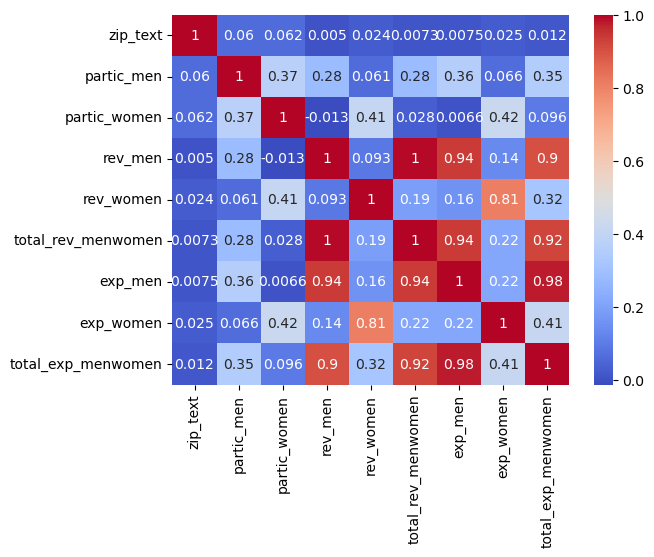

In [58]:
corr_matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

/var/folders/s2/9btr1s3d5qn_bwlr6wycq0780000gn/T/ipykernel_70703/1546388890.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=new_data['sum_partic_men'], y=data['sports'], ci=None)


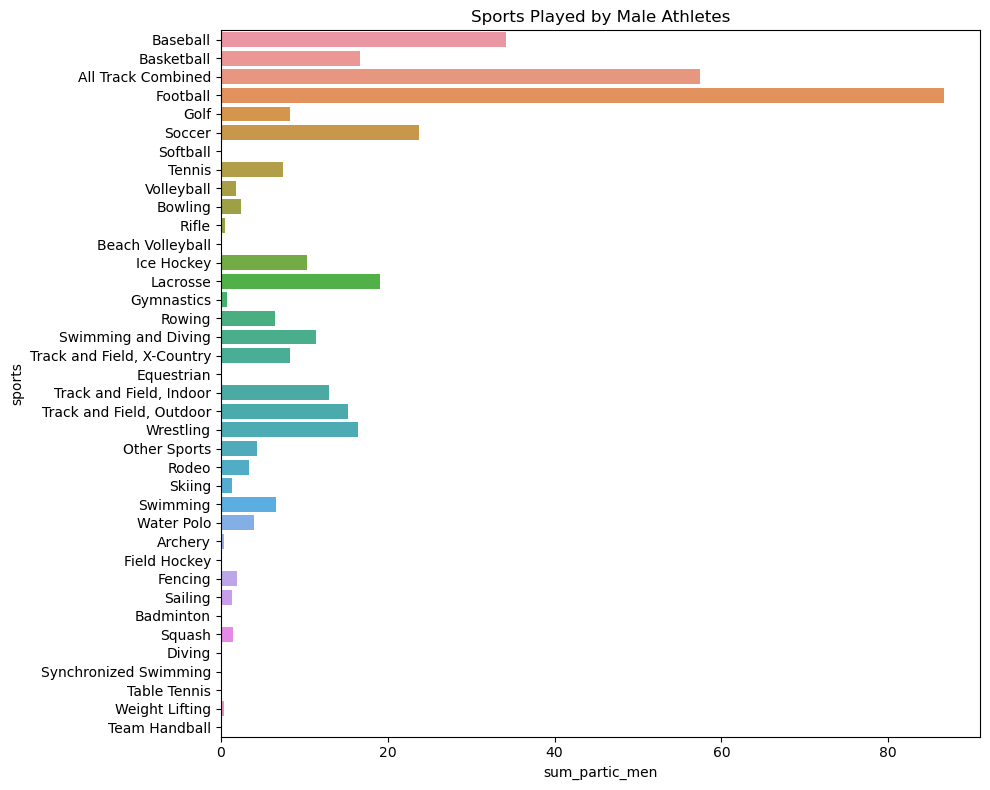

In [21]:
plt.figure(figsize=(10, 8))
sns.barplot(x=new_data['sum_partic_men'], y=data['sports'], ci=None)
plt.title('Sports Played by Male Athletes')
plt.yticks(rotation=0) 
plt.tight_layout()
plt.show()

/var/folders/s2/9btr1s3d5qn_bwlr6wycq0780000gn/T/ipykernel_70703/1804388369.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=new_data['sum_partic_women'], y=data['sports'], ci=None)


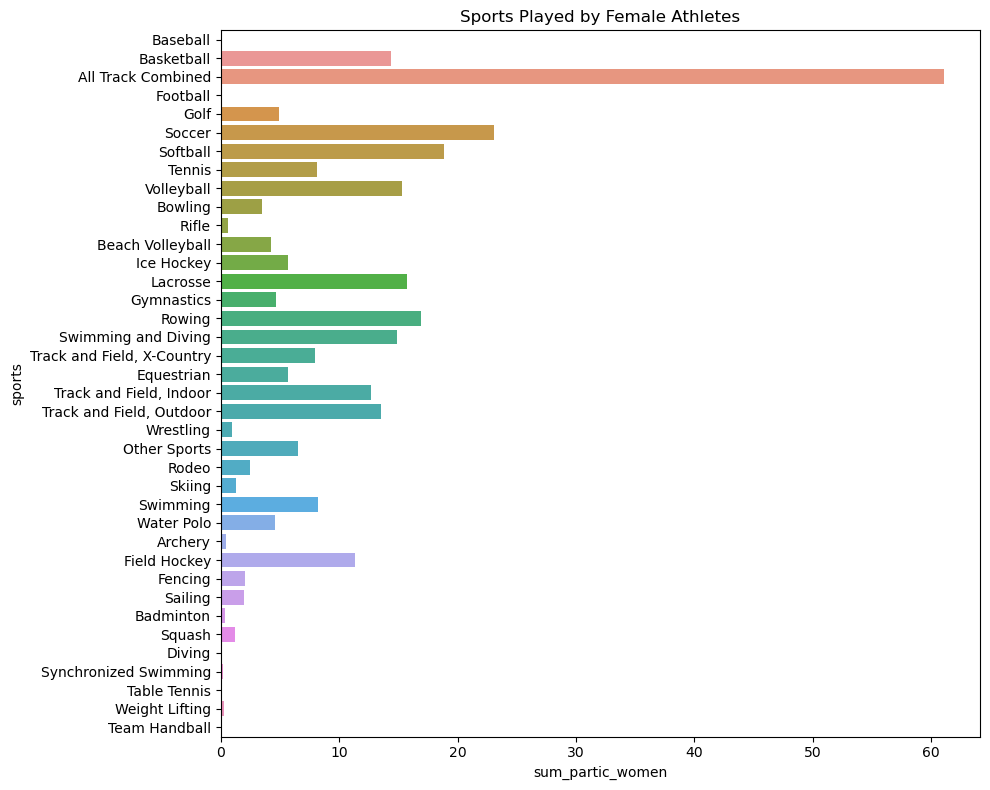

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Increase figure size to provide more space for the plot
plt.figure(figsize=(10, 8))

# Create the bar plot for female athletes
sns.barplot(x=new_data['sum_partic_women'], y=data['sports'], ci=None)

# Add title
plt.title('Sports Played by Female Athletes')

# Rotate Y-axis labels for readability
plt.yticks(rotation=0)  # Rotate the labels if necessary (e.g., rotation=45 or 90)

# Adjust layout to ensure labels fit well
plt.tight_layout()

# Show the plot
plt.show()
